<a href="https://colab.research.google.com/github/Datanerd97/PyTorch/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Apr 14 22:27:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

The 3 areas in industry where computer vision is being used... binary classification, multi-class classification and image segmentation..

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when the model learns everything about the training set, including its noise and biases to the point. Where the model struggles to generalize well onto the test set or the validation set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

The 3 things we can do to prevent overfitting is:


Gather more training data, Use a different machine learning algorithm, Cross-validate the data properly and or check and tweak it based on the validation set.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

The premise still stays the same:

1. Numerically encode your data
2. Feed it into a model
3. Make sure the output fits into your problem.

This is a really good website it explained everything really well.

A CNN Is a type of deep learning algorithm used to recognize patterns in data.


CNN has a variety of components such as a:
* Tensor which is a n - dimensional matrix
* A neuron which is a function that takes input and yields a single output. Where outputs of neurons are represented as activation maps
* A layer is the same collection of neurons with the same operations
* Kernel weight and biases that are tuned to each nueron during the training phase and allows the classifier to adapt to the problem and dataset provided.


* CNN utilize what is called a convolutional layer --> that makes them well-positioned to learn from image or image-like data.

--> They are mostly used for image processing,classification,segmentation and object-detection.

(These are the foundations of CNN) as they contain the learned kernels (weights) which extract features that distinguish different images from one another.

The convolutional neuron performs an elementwise dot-product with a unique kernel and the output of the previous layer's corresponding neuron.

The convolutional nueron is the result of all intermediate results summed together with learned bias.

In order to produce the output of the convolutional nueron (activation-map) we must perform an elementwise dot-product with the output of the previous layer and the unique kernel learned by the network


Some of the hyperparamters are <Padding,Stride,Kernel-Size>


There are activation functions to consider such as:

Relu - which applies non-linearity into the model which is necessary to produce non-linear boundaries such that the output cannot be written as a linear combination of the inputs

- Relu activation function is specifically used as a non-linear function because CCN used to train RELU are faster than their counter parts.


Softmax - which makes sure the CNN outputs to 1


** Pooling Layers

There are many types of pooling layers in CNN architecture **but they have the process of decreasing the spatial extent of the network, which reduces the parameters and the overall computation of the network**

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Setup the packages
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Setup the training set.
training_data = datasets.MNIST(
    root = "data", # Where do we download the data to
    train = True, # Do we want the training set
    download = True, # Do we want to download yes or no
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.24MB/s]


In [4]:
# Setup testing data.
testing_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [5]:
# Let's take a look at the length of the training and the testing.
len(training_data),len(testing_data)

(60000, 10000)

In [6]:
class_names = training_data.classes

class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

Image shape: torch.Size([1, 28, 28])


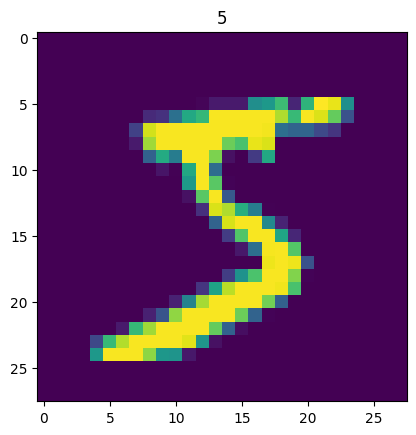

In [8]:
# Visualize atleast 5 different samples of the MNIST training dataset.

import matplotlib.pyplot as plt

image,label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

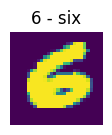

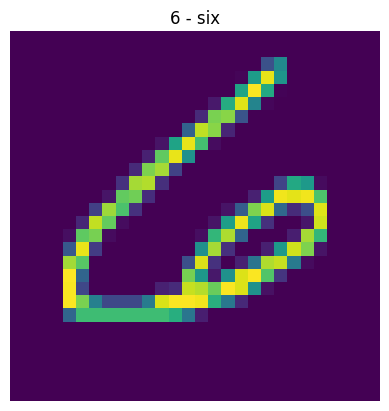

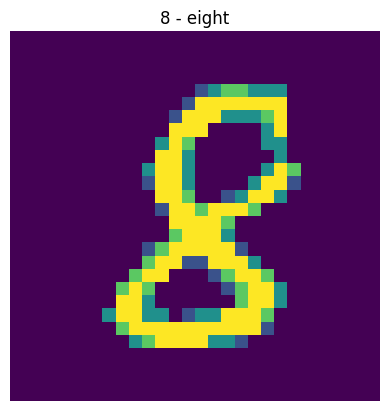

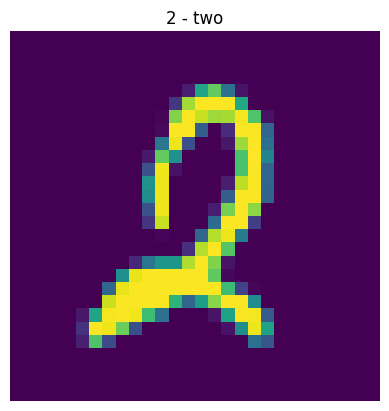

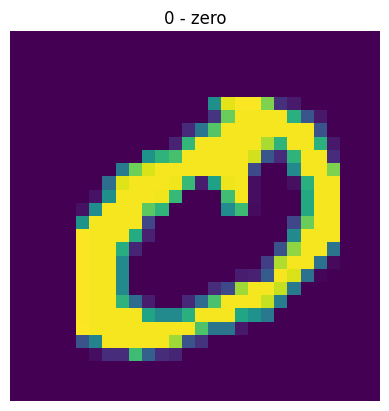

In [9]:
## Let's make a 5 by 1 grid and plot the different numbers..
torch.manual_seed(42)
fig = plt.figure(figsize = (5,7))
rows,col = 5,1

for i in range(1,rows*col+1):
  # Use this loop to grab random images, the .item returns the label
  random_idx = torch.randint(0,len(training_data),size = [1]).item()
  img,label = training_data[random_idx]
  fig.add_subplot(rows,col,i)
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False)
  plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

Right now, our dataset is in the form of Pytorch datasets, but we need to convert it into a Python iterable.

More specifically, we want to turn our data into batches or mini-batches of 32.

Why convert it into batches:
1. It is more computationally efficien, as in your computing hardware may not be able to store 60k images all at once in memory. So we train the models in batches of 32 images at a time.
A batch size of 32 is very common in Machine-Learning.

2. This gives our NN more chances to update its gradient per epochs. (If we look at 32 images at a time, our NN updates its internal states its weights.)

In [10]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterable. (batches)

train_dataloader = DataLoader(dataset = training_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)


test_dataloader = DataLoader(dataset = testing_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

Remember to use the shuffle argument, because we do not want the NN to remember the order of the data, but the general and individual patterns between classes.
Thus we shuffle the data.

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [39]:
from torch import nn

class MNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int,
               ):
    super().__init__()
    # Sequential allows us to go layer by layer..
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                   out_channels = hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
       nn.ReLU(),
       nn.Conv2d(in_channels = hidden_units,
                 out_channels = hidden_units,
                 kernel_size = 3,
                 stride = 1,
                 padding = 1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size = 2),
   )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x) # This is the likely error here.. your model is returning the output before the final classifier layer.
    return x




ERROR:
why we need self.classifier(x)
I see the likely issue: your model is returning the output before the final classifier layer.

So when you return x from your forward() method, it's still a feature map with shape [batch_size, channels, height, width] — i.e., a 4D tensor, likely [batch_size, hidden_units, 7, 7]. This is typical for segmentation, but if you're doing classification (like classifying MNIST digits), this is not what you want.

🧠 What's Going Wrong?
Because you're returning a 4D tensor, PyTorch thinks you're doing a per-pixel prediction task like semantic segmentation. So when you compute the loss (e.g., with nn.CrossEntropyLoss()), it expects your targets to also have spatial dimensions, like [batch_size, height, width].

But you're passing in standard class labels with shape [batch_size], e.g., tensor([5, 0, 1, 3, ...]). That's correct for classification — but it doesn't match your model output.

These two layers we have created are called feature extractors, In other words they are trying to learn the patterns that best represent their data. Then this final layer is going to take those features and classify them into our target classes, whatever our model think best suits those features or whatever our model think those features that it has learned represents in terms of our classes.

In [40]:
torch.manual_seed(43)
model_2 = MNISTModelV2(input_shape = 1,
                       hidden_units = 10,
                       output_shape = len(class_names))

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

Setup and define the train_step and the test_step function.

In [42]:
import requests

from pathlib import Path

# Download helper functions from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download..")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download..


In [43]:
from helper_functions import accuracy_fn


def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):

  """ Performs a training with model trying to learn on data_loader """
  train_loss,train_acc = 0,0

  # Put model into training mode
  model.train()

  # Add a loop to loop thorugh the tranining batches

  for batch, (X,y) in enumerate(data_loader):
    # Forward pass (output the raw logits from the model)
    y_pred = model(X)

    # Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim = 1)) # go from logits -> prediction labels

    # Optimizer zero grad
    optimizer.zero_grad()


    # Loss backwards
    loss.backward()

    # Optimizer step (update the model's parameters once per batch..)
    optimizer.step()

    # Divide the total train loss and accuracy by length of train dataloader (avg loss and avg test loss)

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")


In [44]:
# Define the test run function..

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """ Performs a testing loop step on model going over data loader """
  test_loss,test_acc = 0,0

  # Put model into eval mode:
  model.eval()


  with torch.inference_mode():
    for X,y in data_loader:

      # Do the forward pass
      test_pred = model(X)

      # 2 calculate loss/accuracy
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim = 1)) # Go from logits -> Prediction labels

  # Adjust metrics and print it out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss : {test_loss:.5f} | Test acc: {test_acc:.2f}")



Remember that we are accumulating loss and accuracy across batches. You should divide by the number of batches which is len(data_loader)

In [45]:
# Need to define the train_step and the test_step functions
torch.manual_seed(43)


# Set epochs to 5
epochs = 5

# Create an optimization and evaluation loop using train_step and test_step()
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)



Epoch: 0
-------
Train Loss: 0.30828 | Train acc: 89.36
Test Loss : 0.06355 | Test acc: 97.89
Epoch: 1
-------
Train Loss: 0.06663 | Train acc: 97.90
Test Loss : 0.05575 | Test acc: 98.11
Epoch: 2
-------
Train Loss: 0.05235 | Train acc: 98.32
Test Loss : 0.05025 | Test acc: 98.43
Epoch: 3
-------
Train Loss: 0.04416 | Train acc: 98.64
Test Loss : 0.04520 | Test acc: 98.47
Epoch: 4
-------
Train Loss: 0.03881 | Train acc: 98.80
Test Loss : 0.05507 | Test acc: 98.18


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [47]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in (data_loader):
      # Make our data device data agnostic
      #X,y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

      # Scale loss and acc to find average loss/acc per batcg

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [49]:
# Let;s take a look at the results..

model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
)

model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.05514194071292877,
 'model_acc': 98.1729233226837}

Okay the above shows how our model is evaluated.. and it returns the model_loss and the model accuracy.

In [64]:
## Let's make a prediction using the make_predictions functions..

def make_predictions(model: torch.nn.Module,
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the same (add a batch dimension and pass to target device (which I did not do))
      sample = torch.unsqueeze(sample,dim = 0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob)

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [65]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(testing_data),k = 5):
  test_samples.append(sample)
  test_labels.append(label)


# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '6 - six')

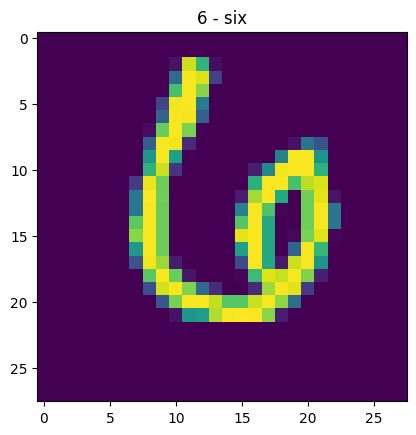

In [66]:
# Plot the first digit just in case..
plt.imshow(test_samples[0].squeeze())
plt.title(class_names[test_labels[0]])

In [67]:
# make Predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.5764e-06, 9.5927e-09, 5.7622e-10, 3.2381e-10, 1.6659e-07, 3.3382e-08,
         1.0000e+00, 1.6954e-10, 1.8097e-06, 8.3246e-10],
        [2.9587e-15, 2.1176e-07, 4.7179e-10, 3.0837e-12, 1.0000e+00, 1.9056e-10,
         4.9190e-14, 1.6754e-07, 3.1333e-08, 1.6310e-07]])

In [68]:
pred_classes = pred_probs.argmax(dim = 1) # Takes argmax takes the index..

pred_classes

tensor([6, 4, 9, 1, 1])

In [69]:
test_labels

[6, 4, 9, 1, 1]

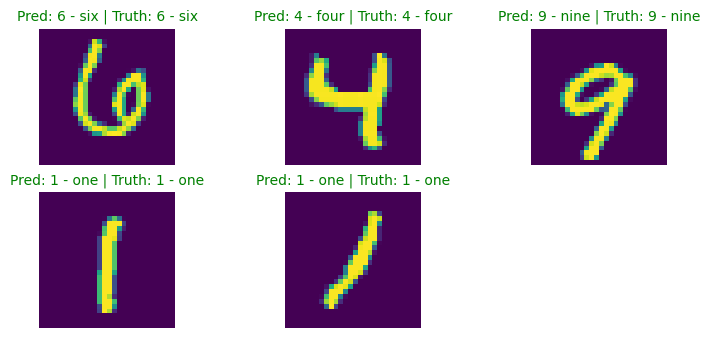

In [73]:
# Plot predictions

plt.figure(figsize = (9,6))
nrows = 3
ncols = 3

for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze())

  # Find the prediction in text form..
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  # Create a title text
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text,fontsize = 10,c = 'g') # Green Text
  else:
    plt.title(title_text,fontsize = 10, c = 'r')

  plt.axis(False);


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [74]:
try:
 # import torchmetrics, mlxtend
  print(f"mixtend version: {mixtend.__version__}")
  assert int(mixtend.__version__.split(".")[1] >= 19, "mixtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mixtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [76]:
# Make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in test_dataloader:
    # Do forward pass
    y_logit = model_2(X)
    # Turn predictions into logits -> Prediction probablities -> Prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim = 0).argmax(dim = 1)
    # Put prediction for evaluations
    y_preds.append(y_pred)

  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor


In [77]:
len(y_pred_tensor)

10000

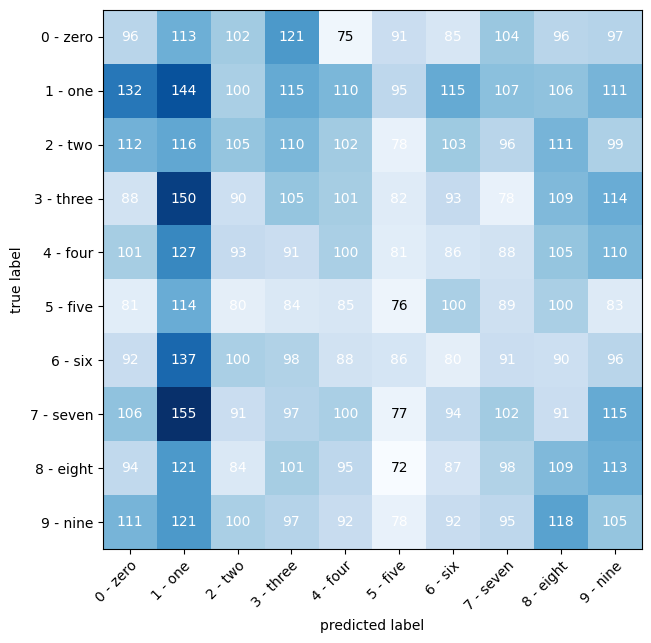

In [78]:
import torchmetrics,mlxtend

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task = 'multiclass',num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = testing_data.targets)

# Plot confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # Matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10,7)
)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?